<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Análisis de los datos históricos de existencias/ingresos y creación de un cuadro de mando</h1>

<h2>Tabla de Contenidos</h2>
<div class="alert alert-block" style="margin-top: 20px; padding: 10px; border: 1px solid #ccc; width: auto">

<p>Pregunta 1. Extracción de datos de acciones de Tesla utilizando yfinance<p>
<p>Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping <p>
<p>Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance<p>
<p>Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping<p>
<p>Pregunta 5 - Tablero de acciones e ingresos de Tesla<p>
<p>Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop<p>
<p>Pregunta 7 - Compartir su cuaderno de tareas <p>

<hr>

<h4>Importar bibliotecas</h4>

In [12]:
!pip install yfinance pandas requests beautifulsoup4 plotly lxml html5lib matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 165.9 MB/s eta 0:00:00


In [4]:
# Importar librerías necesarias
import yfinance as yf  # Para datos históricos de acciones
import pandas as pd  # Para manejo de tablas y datos
import requests  # Para hacer solicitudes HTTP (webscraping)
from io import StringIO  # Para leer HTML desde string
from bs4 import BeautifulSoup  # Para análisis de HTML si se necesita
import plotly.graph_objects as go  # Para gráficos interactivos
from plotly.subplots import make_subplots  # Para dashboards con varias gráficas

ModuleNotFoundError: No module named 'yfinance'

In [5]:
# Pregunta 1: Datos de Tesla con yfinance
# ------------------------
tesla = yf.Ticker("TSLA")  # Crear objeto de Tesla
tesla_stock = tesla.history(period="5y")  # Obtener historial de precios de los últimos 5 años
tesla_stock.reset_index(inplace=True)  # Resetear índice
print("Tesla Stock Data:")  # Mensaje informativo
print(tesla_stock.head())  # Mostrar primeras filas

Tesla Stock Data:
                       Date        Open        High         Low       Close  \
0 2020-10-28 00:00:00-04:00  138.826660  139.533340  135.333328  135.339996   
1 2020-10-29 00:00:00-04:00  136.653336  139.353333  135.486664  136.943329   
2 2020-10-30 00:00:00-04:00  135.633331  135.863327  126.370003  129.346664   
3 2020-11-02 00:00:00-05:00  131.333328  135.660004  130.766663  133.503326   
4 2020-11-03 00:00:00-05:00  136.576660  142.589996  135.563339  141.300003   

      Volume  Dividends  Stock Splits  
0   76354200        0.0           0.0  
1   67965900        0.0           0.0  
2  127533900        0.0           0.0  
3   87063300        0.0           0.0  
4  103055100        0.0           0.0  


In [10]:
# URL de los ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"class": "historical_data_table table"})

dates = []
revenues = []

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue and revenue.lower() != "":
            dates.append(date)
            revenues.append(float(revenue))

gme_revenue = pd.DataFrame({"Date": dates, "Revenue (Millions USD)": revenues})

print(gme_revenue.tail())


    Date  Revenue (Millions USD)
10  2015                  9296.0
11  2014                  9040.0
12  2013                  8887.0
13  2012                  9551.0
14  2011                  9474.0


In [10]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

response = requests.get(url, headers=headers)
html = response.text

soup = BeautifulSoup(html, "html.parser")

table = soup.find("table", {"class": "historical_data_table table"})

if table is None:
    print("⚠️ No se encontró la tabla. La web puede haber cambiado el formato o bloqueado la petición.")
else:
    dates = []
    revenues = []

    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue and revenue.lower() != "": 
                dates.append(date)
                revenues.append(float(revenue))

    tesla_revenue = pd.DataFrame({"Date": dates, "Revenue (Millions USD)": revenues})

    print(tesla_revenue.tail())

    Date  Revenue (Millions USD)
10  2014                  3198.0
11  2013                  2013.0
12  2012                   413.0
13  2011                   204.0
14  2010                   117.0


In [15]:
import matplotlib.pyplot as plt
import yfinance as yf

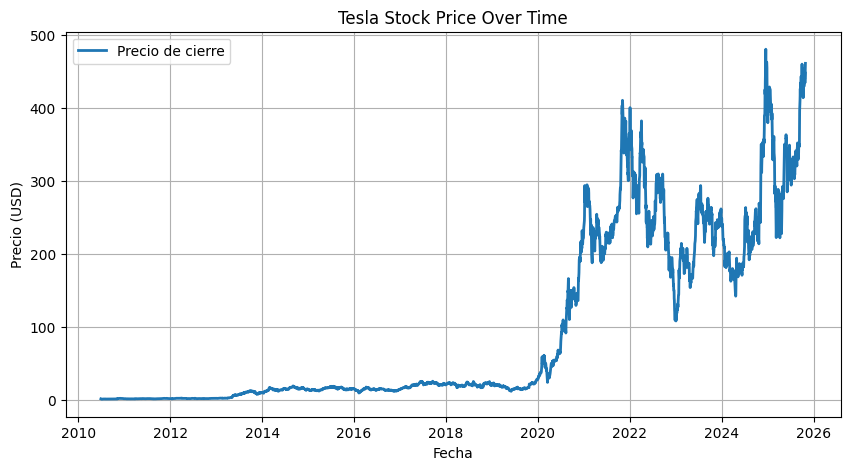

In [16]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")  # Datos históricos completos

def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Precio de cierre', linewidth=2)
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")


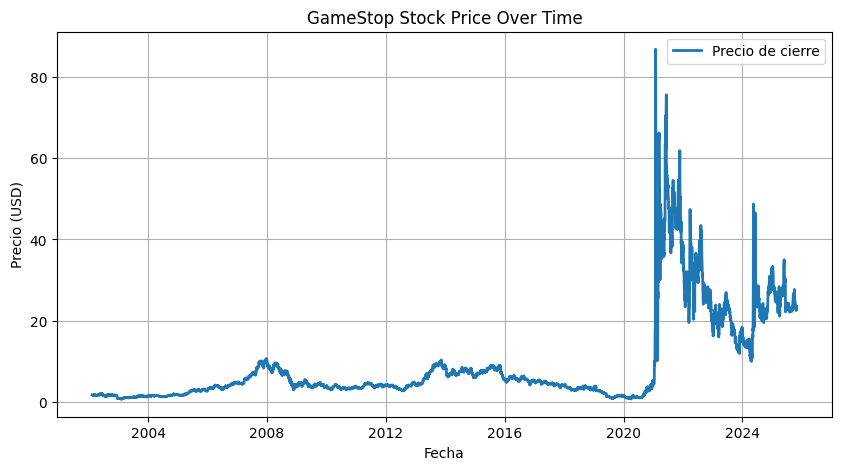

In [17]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")  # Datos históricos completos

def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Precio de cierre', linewidth=2)
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gme_data, "GameStop Stock Price Over Time")